In [ ]:
#Normal Dagilim 
"""
    Doğada en fazla karşılaşılan sürekli dağılım "normal dağılım (normal distribution)" denilen dağılımdır. Bu dağılımın olasılık 
    yoğunluk fonksiyonu çan eğrisine benzemektedir. Normal dağılımın iki parametresi vardır: "Ortalama" ve "standart sapma". 
    Ortalama çan eğrisinin orta noktasını belirler. Standart sapma ise eğrinin zayıf ya da şişman olması üzerinde etkili olur. 
    Çan eğrisine teknik olarak "Gauss Eğrisi", Gauss eğrisine ilişkin olasılık yoğunluk fonksiyonuna da "Gauss fonksiyonu" 
    denilmektedir. 

    Gauss fonksiyonu simetrik bir fonksiyondur. Bu fonksiyon ortalama etrafında büyük bir alan kaplar, iki uca gidildikçe 
    hızlı bir düşüş yaşanır. Ancak eğri hiçbir zaman X ekseni ile kesişmemektedir. Yani eğri iki taraftan y değeri olarak 
    sıfıra oldukça yaklaşır, ancak sıfır olmaz. 

    Gauss fonksiyonu bir olasılık yoğunluk fonksiyonu belirttiğine göre fonksiyonun toplam eğri altında alanı 1'dir. Fonksiyon 
    simetirk olduğuna göre ortalamanın iki yanında eğri altında kalan alan 0.5'tir. 

    Değişik ortalama ve standart sapmaya ilişkin sonsuz sayıda Gauss eğrisi çizilebilir. Ortalaması 0, standart sapması 1 olan
    normal dağılıma "standart normal dağılım" da denilmektedir. Genellikle istatistiktre standart normal dağılımdaki X değerlerine
    "Z değerleri" denilmektedir. 


"""

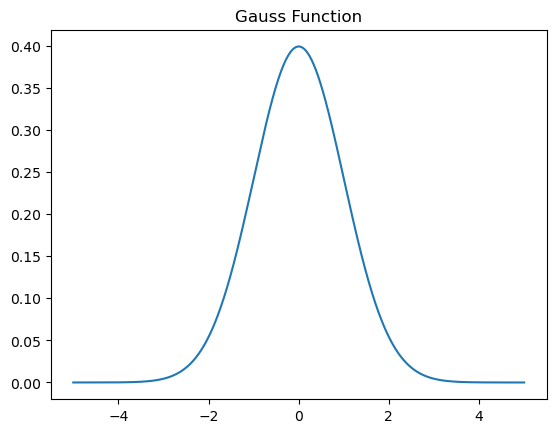

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def gauss(x, mu = 0, std = 1):
    return 1 / (std * np.sqrt(2 * np.pi)) * np.e ** (-0.5 * ((x - mu) / std) ** 2)
    
x = np.linspace(-5, 5, 1000)
y = gauss(x)

plt.title('Gauss Function')
plt.plot(x, y)
plt.show()

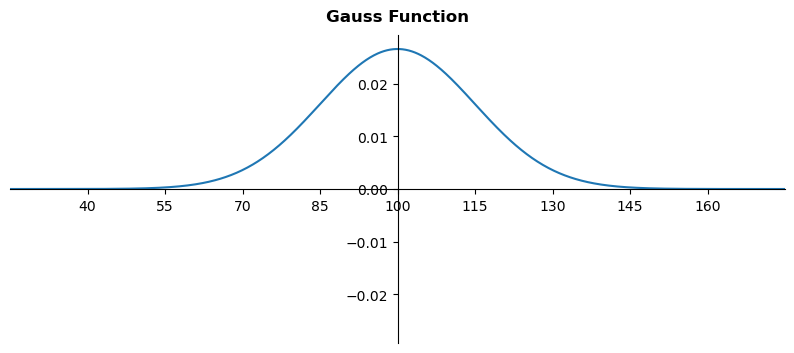

In [3]:
#Yukarıdaki çizimde eksenleri kartezyen koordinat sistemindeki gibi de gösterbiliriz. 
import numpy as np
import matplotlib.pyplot as plt

def gauss(x, mu = 0, std = 1):
    return 1 / (std * np.sqrt(2 * np.pi)) * np.e ** (-0.5 * ((x - mu) / std) ** 2)
  
    
def draw_gauss(mu = 0, std = 1):
    x = np.linspace(-5 * std + mu, 5 * std + mu, 1000)
    y = gauss(x, mu, std)
    
    mu_y = gauss(mu, mu, std)
    
    plt.figure(figsize=(10, 4))
    plt.title('Gauss Function', pad=10, fontweight='bold')
    axis = plt.gca()
    
    axis.set_ylim([-mu_y * 1.1, mu_y * 1.1])
    axis.set_xlim([-5 * std + mu, 5 * std + mu])
    axis.set_xticks(np.arange(-4 * std + mu, 5 * std + mu, std))
    # axis.set_yticks(np.round(np.arange(-mu_y, mu_y, mu_y / 10), 2))
    axis.spines['left'].set_position('center')
    axis.spines['top'].set_color(None)
    axis.spines['bottom'].set_position('center')
    axis.spines['right'].set_color(None)
    axis.plot(x, y)
    plt.show()

draw_gauss(100, 15)




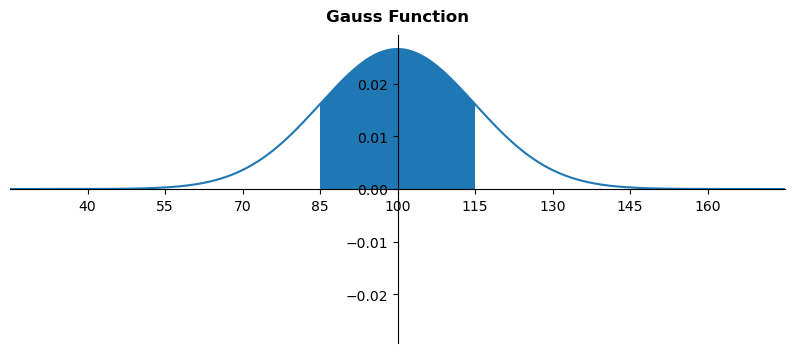

In [5]:
"""
    Normal dağılımda eğri altında kalan toplam alanın 1 olduğunu belirtmiştik. Bu dağılımda toplaşmanın ortalama civarında 
    olduğu eğirinin şeklinden anlaşılmaktadır. Gerçektende normal dağılımda ortalamadan bir standart sapma soldan ve sağdan 
    kaplanan alan yani P{mu - std < X < mu + std} olasılı 0.68.27, ortalamadna iki standart sapma soldan ve sağdan kaplanan 
    alan yani P{mu - std * 2< X < mu + std * 2} olasılığı 95.45 biçimindedir. 

    Matplotlib'te bir eğrinin altındaki alanı boyamak için fill_between isimli fonksiyon kullanılmaktadır. Bu fonksiyon axis 
    sınıfının bir metodu olarak da bulundurulmuştur. Aşağıdaki örnekte eğrinin altındaki belli bir alan fill_between metodu
    ile boyanmıştır.
"""

import numpy as np
import matplotlib.pyplot as plt

def gauss(x, mu = 0, std = 1):
    return 1 / (std * np.sqrt(2 * np.pi)) * np.e ** (-0.5 * ((x - mu) / std) ** 2)
      
def draw_gauss(mu = 0, std = 1, fstart= 0, fstop = 0):
    x = np.linspace(-5 * std + mu, 5 * std + mu, 1000)
    y = gauss(x, mu, std)
    
    mu_y = gauss(mu, mu, std)
    
    plt.figure(figsize=(10, 4))
    plt.title('Gauss Function', pad=10, fontweight='bold')
    axis = plt.gca()
    
    axis.set_ylim([-mu_y * 1.1, mu_y * 1.1])
    axis.set_xlim([-5 * std + mu, 5 * std + mu])
    axis.set_xticks(np.arange(-4 * std + mu, 5 * std + mu, std))
   # axis.set_yticks(np.round(np.arange(-mu_y, mu_y, mu_y / 10), 2))
    axis.spines['left'].set_position('center')
    axis.spines['top'].set_color(None)
    axis.spines['bottom'].set_position('center')
    axis.spines['right'].set_color(None)
    axis.plot(x, y)
    
    x = np.linspace(fstart, fstop, 1000)
    y = gauss(x, mu, std)
    axis.fill_between(x, y)
    plt.show()

draw_gauss(100, 15, 85, 115)


In [ ]:
#CDF Tanimi :
"""
    Kümülatif dağılım fonksiyonu (cummulative distribution function) belli bir değere kadar tüm birikimli olsılıkları veren 
    fonksiyondur. Genellikle F harfi gösterilmektedir. Mrneğin F(x0) aslında P{X < x0} anlamına gelmektedir. Normal dağılımda 
    F(x0) değeri aslında eğride X değerinin x0 olduğu noktadan soldaki tüm eğri altında kalan alanı belirtmektedir. (Başka bir 
    deyişle sürekli dağılımlarda F(x0) değeri "-sonsuzdan x0'a kadar olasılık yoğunluk fonksiyonunun integraline eşittir)
    
    Yukarıda da belirttiğimiz gibi normal dağılım istatistikte çok önemli bir sürekli dağılımdır. Normal dağılımın önemi 
    "merkezi limit teoremi (central limit theorem)" ile daha iyi anlaşılabilir. Merkezi limit teoremini izleyen paaragraflarda 
    ele alacağız. Çıkarımsal istatistiğin dayandığı temel merkezi limit teoremi olduğu için normal dağılım da çok önemli olmaktadır.
    Bizim de Python programcısı olarak normal dağılım üzerinde aşağıdaki dört işlemi yapabiliyor olmamız gerekir:
    
    1) Belli bir x değeri için eksi sonsuzdan o x değerine kadar eğri altında kalan alanı bulmak. Yukarıda da belirttiğimiz gibi 
    aslında bu alanı veren fonksiyona istatistikte "kümaltif dağılım fonksiyonu (cummulative distribution function)" denmektedir. 
    O halde aslında P{x0 < X < x1} olasılığı F(x1) - F(x0) ile aynıdır. 
    
    2) Yukarıdaki işlemin tersi olan işlem, yani bize kümülatif dağılım fonksiyonundan elde edilen değer verilmiş olabilir.
    Bizden buna ilişkin x değeri istenebilir. 

    3) Belli bir x değeri için Gauss fonksiyon değerinin elde edilmesi. (Yani belli bir x değeri için olasılık yoğunluk fonksionunun
    değerinin elde edilmesi)

    4) Normal dağılıma uygun rastgele sayıların üretilmesi. Aslında bunun için 0 ile 1 arasında rasgele sayı üretilip onu 2'inci 
    maddede belirtelin işleme sokarsak normal dağılmış rastgele sayı elde edebiliriz. 
    
"""

In [32]:
"""
    Normal dağılımla ilgili işlemleri yapabilmek için Python standart kütüphanesinde statistics modülü içerisinde NormalDist 
    isimli bir sınıf bulundurulmuştur. Programcı bu sınıf türünden bir nesne yaratır. İşlemlerini bu sınıfın metotlarıyla yapar.
    NormalDist nesnesi yaratılırken __init__ metodu için ortalama ve standart sapma değerleri girilir. (Bu değerler girilmezse 
    ortalama için sıfır, standart sapma için 1 default değerleri kullanılmaktadır.) Örneğin:

"""

#NormalDist sınıfının cdf (cummulative distribution function) isimli metodu verilen x değeri için eğrinin solunda kalan 
#toplam alanı yani kümülatif olasılığı bize vermektedir. Örneğin standart normal dağılımda x = 0'ın solunda alan 0.5'tir.

import statistics 

nd = statistics.NormalDist(100, 15)
result = nd.cdf(0)
print(result)           # 0.5
print("***")

#Örneğin biz ortalaması 100, standart sapması 15 olan bir normal dağılımda P{130 < x < 140} olasılığını aşağıdaki gibi elde edebiliriz:
result = nd.cdf(140) - nd.cdf(130)
print(result)
print("***")
"""
    Şöyle bir soru sorulduğunu düşünelim: "İnsanların zekaları ortalaması 100, standart sapması 15 olan normal dağılıma uygundur. 
    Bu durumda zeka puanı 140'ın yukarısında olanların toplumdaki yüzdesi nedir?". Bu soruda istenen şey aslında normal dağılımdaki
    P{X > 140} olasılığıdır. Yani x ekseninde belli bir noktanın sağındaki kümülatif alan sorulmaktadır. Bu alanı veren doğrudan 
    bir fonksiyon olmadığı için bu işlem 1 - F(140) biçiminde ele alınarak sonuç elde edilebilir. Yani örneğin:

"""
result = 1 - nd.cdf(140)
print(result)


1.3083922834056239e-11
***
0.018919751380589434
***
0.003830380567589664


In [10]:
import statistics

nd = statistics.NormalDist(100, 15)

result = nd.cdf(140) - nd.cdf(130)
print(result)

0.018919751380589434


0.06846108777768878


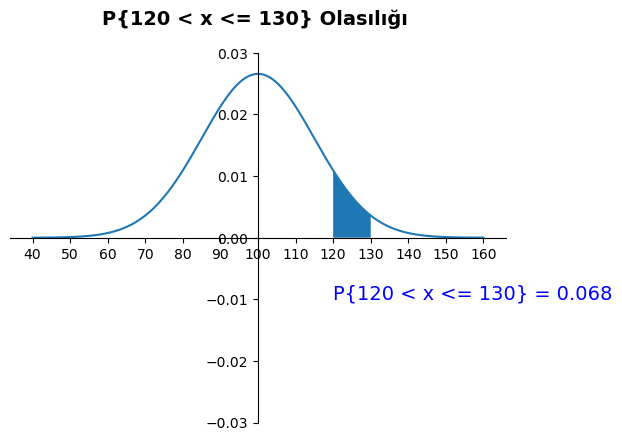

In [11]:
"""
    Yukarıda da belirttiğimiz gibi bir normal dağılımda iki x arasındaki alanı yani P{x1 < X <= x2} olasılığını biz cdf 
    fonksiyonuyla F(x2) - F(x1) işlemi ile elde edebiliriz. Örneğin ortalaması 100 standart sapması 15 olan normal doğılımda 
    120 ile 130 arasındaki olasılık aaşağıdaki gibi hesaplanıp grafiği çizdirilebilir.  

"""
import statistics
import numpy as np

nd = statistics.NormalDist(100, 15)

result = nd.cdf(130) - nd.cdf(120)
print(result)

import matplotlib.pyplot as plt

plt.title('P{120 < x <= 130} Olasılığı ', pad=20, fontsize=14, fontweight='bold')
x = np.linspace(40, 160, 1000)
y = [nd.pdf(val) for val in x]

axis = plt.gca()
axis.set_ylim(-0.030, 0.030)
axis.spines['left'].set_position('center')
axis.spines['bottom'].set_position('center')
axis.spines['top'].set_color(None)
axis.spines['right'].set_color(None)

axis.set_xticks(range(40, 170, 10))

plt.plot(x, y)

x = np.linspace(120, 130, 100)
y = [nd.pdf(val) for val in x]

axis.fill_between(x, y)
plt.text(120, -0.01, f'P{{120 < x <= 130}} = {result:.3f}', color='blue', fontsize=14)

plt.show()


In [ ]:
"""
    Eskiden bilgisayarların bu kadar yoğun kullanılmadığı zamanlarda standart normal dağılım için "Z Tabloları" düzenlenmekteydi.
    Bu tablolar belli bir Z değeri için (standart normal dağılımdaki X değerlerine Z değeri dendiğini anımsayınız) kümülatif dağılım
    fonksiyonun değerini vermektedir. Örnek bir Z tablosu aşağıdakine benzemektedir:

    	    0.00	0.01	0.02	0.03	0.04	0.05	0.06	0.07	0.08	0.09
    0.0	    0.5000	0.5040	0.5080	0.5120	0.5160	0.5199	0.5239	0.5279	0.5319	0.5359
    0.1	    0.5398	0.5438	0.5478	0.5517	0.5557	0.5596	0.5636	0.5675	0.5714	0.5753
    0.2	    0.5793	0.5832	0.5871	0.5910	0.5948	0.5987	0.6026	0.6064	0.6103	0.6141
    0.3	    0.6179	0.6217	0.6255	0.6293	0.6331	0.6368	0.6406	0.6443	0.6480	0.6517
    0.4	    0.6554	0.6591	0.6628	0.6664	0.6700	0.6736	0.6772	0.6808	0.6844	0.6879
    0.5	    0.6915	0.6950	0.6985	0.7019	0.7054	0.7088	0.7123	0.7157	0.7190	0.7224
    0.6	    0.7257	0.7291	0.7324	0.7357	0.7389	0.7422	0.7454	0.7486	0.7517	0.7549
    0.7	    0.7580	0.7611	0.7642	0.7673	0.7704	0.7734	0.7764	0.7794	0.7823	0.7852
    0.8	    0.7881	0.7910	0.7939	0.7967	0.7995	0.8023	0.8051	0.8078	0.8106	0.8133
    0.9	    0.8159	0.8186	0.8212	0.8238	0.8264	0.8289	0.8315	0.8340	0.8365	0.8389
    1.0	    0.8413	0.8438	0.8461	0.8485	0.8508	0.8531	0.8554	0.8577	0.8599	0.8621
    1.1	    0.8643	0.8665	0.8686	0.8708	0.8729	0.8749	0.8770	0.8790	0.8810	0.8830
    1.2	    0.8849	0.8869	0.8888	0.8907	0.8925	0.8944	0.8962	0.8980	0.8997	0.9015
    ......................................................................................

    Bu tabloda ilgili hücredeki değer o Z değerinin kümülatif olasılığını vermektedir. Tabii artık bir bilgisayar programcısının
    böyle bir tablo kullanmasına gerek yoktur. Yukarıdaki gibi tablolar yalnızca belli kesikliği değerikeri yuvarlayarak vermektedir  

    Pekiyi bu Z tabloları standart normal dağılıma göre hazırlandığına göre biz belli bir ortalama ve standart sapmaya ilişkin
    kümülatif olaılığı bu tablo yoluyla nasıl elde edebilmekteyiz? İşte aslında herhangi bir normal dağılım standart normal dağılıma 
    transpoze edilebilmektedir. Ortalaması mu standart sapması std olan normal dağılımdaki x değerinin standart normal dağılımdaki 
    Z değeri şöyle hesaplanmaktadır:

    Z = (x - mu) / std

    Örneğin ortalaması 100, standart sapması 15 olan normal dağılımdaki x = 140 değerinin standart normal dağılımdaki Z 
    değeri 2.66'dır.

"""

In [12]:
"""
    Belli bir kümülatif olasılık değeri için x değerinin bulunması işlemi de NormalDist sınıfının inv_cdf metoduyla yapılmaktadır. 
    Örneğin standart normal dağılımda 0.99 olan kümülatif olasılığın Z değeri aşağıdaki gibi bulunabilir:
"""
import statistics

nd = statistics.NormalDist()

result = nd.inv_cdf(0.99)
print(result)       # 2.32

2.3263478740408408


0.3989422804014327
***
[0.6890814890298441, -0.1180646458433603, -0.9580397459090214, 0.16498789133953456, 0.6602216924007828, -1.3009188882699838, -0.1892695998394657, 2.0297156583343465, 0.22554589653803936, 0.273795351974823]


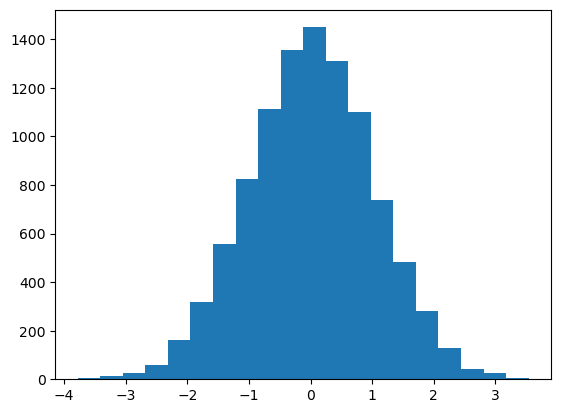

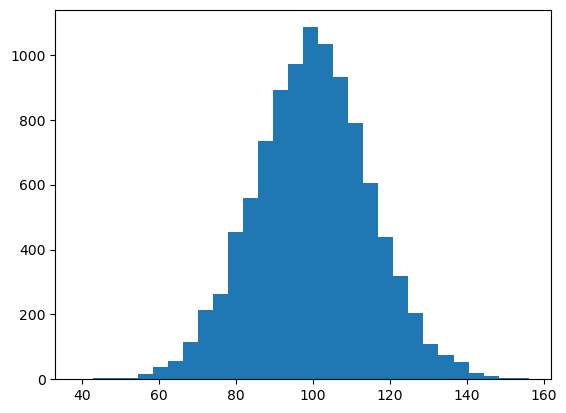

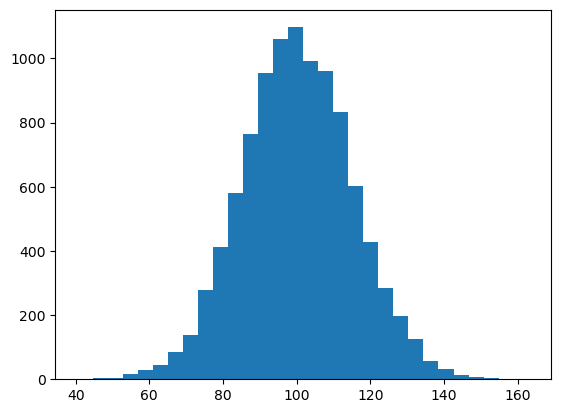

In [18]:
"""
    Belli bir x değeri için Gauss fonksiyonunda ona karşı gelen y değeri sınıfın pdf metduyla elde edilmektedir. Örneğin x = 0
    için standart normal dağılımda Gauss fonksiyonu değerini aşağıdaki gibi elde edebiliriz:
"""
import statistics

nd = statistics.NormalDist()

result = nd.pdf(0)
print(result)   # 0.3989422804014327

"""
    Normal dağılmış rasgele n tane sayı üretmek için NormalDist sınıfının samples isimli metodu kullanılmaktadır. Bu metot 
    bize bir liste olarak n tane float değer verir. Örneğin:
"""

import statistics  #    Bu işlemden biz normal dağılmış 10 tane rasgele değerden oluşan bir liste elde ederiz.
nd = statistics.NormalDist()
result = nd.samples(10)
print("***")
print(result)

#Biz normal dağılmış rastgele sayılardan histogram çizersek histogramımızın Gauss eğrisine benzemesi gerekir.

import statistics
nd = statistics.NormalDist()
result = nd.samples(10000)
import matplotlib.pyplot as plt
plt.hist(result, bins=20)
plt.show()

#    Pekiyi normal dağılmış rastgele sayı üretme işlemini samples metodu nasıl yapmaktadır? Aslında klasik yöntem önce [0, 1]
#  aralığında rastgele sayı üretim bunu kümülatif dağılım olarak kabul etmek ve bu kümülatif dağılımın x değerini hesaplamtır.
import matplotlib.pyplot as plt
import random
import statistics
nd = statistics.NormalDist(100, 15)
result = [nd.inv_cdf(random.random()) for _ in range(10000)]
plt.hist(result, bins=30)
plt.show()

"""
    Aslında normal dağılmış rasgele sayı üretmek için standart random modülü içerisinde de gauss isimli bir fonksiyon 
    bulundurulmuştur. Ancak bu fonksiyon bir tane rastgele sayı vermektedir. 
"""
import random
result = [random.gauss(100, 15) for _ in range(10000)]
import matplotlib.pyplot as plt
plt.hist(result, bins=30)
plt.show()


In [19]:
"""
    Python'ın statistics modülündeki NormalDist sınıfı vektörel işlemler yapamamaktadır. Maalesef NumPy ve Pandas kütüphanelerinde 
    normal dağılım üzerinde vektörel işlem yapan öğeler yoktur. Ancak SciPy kütüphanesi içerisinde pek çok dağılım üzerinde 
    vektörel işlemler yapan sınıflar bulunmaktadır. Bu nedenle pratikte Python kütüphanesi yerine bu tür işlemler için SciPy 
    kütüphanesi tercih edilmektedir. 
    
    scipy.stats modülü içerisindeki norm isimli singleton nesne normal dağılım üzerinde vektörel işlem yapan metotlara sahiptir. 
    norm bir sınıf nesnesidir ve zaten yaratılmış bir biçimde bulunmaktadır. Dolayısıyla programcı doğrudan bu nesne ile ilgili 
    sınıfın metotlarını çağırabilir. Genellikle programcılar bu tür nesneleri kullanmak için from import deyimini tercih ederler:

    from scipy.stats import norm
    norm nesnesine ilişkin sınıfın cdf isimli metodu üç parametre almaktadır:
    cdf(x, loc=0, scale=1)

    Buradaki x bir NumPy dizisi ya da Python dolaşılabilir nesnesi olabilir. Bu durumda tüm x değerlerinin kümülatif olasılıkları 
    hesaplanıp bir NumPy dizisi olarak verilmektedir. Burada loc ortalamayı, scale ise standart sapmayı belirtmektedir. Örneğin:
"""

from scipy.stats import norm
result = norm.cdf([100, 130, 140], 100, 15)
print(result)


[0.5        0.97724987 0.99616962]


[100.         107.01548199 124.6728044 ]


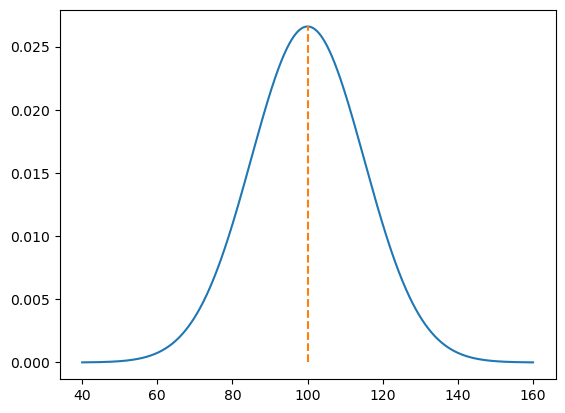

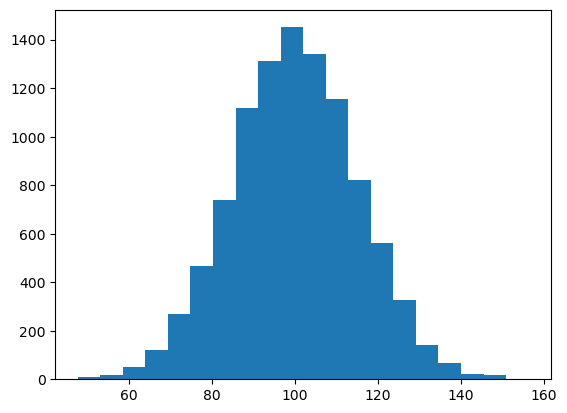

0.6826894921370859


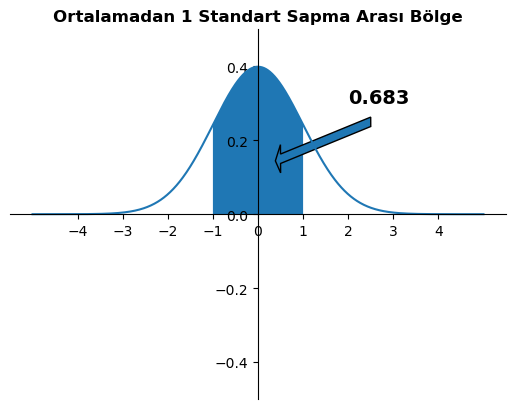

In [22]:
"""
    norm nesnesinin ilişkin olduğu sınıfın ppf (percentage point function) isimli metodu cdf işleminin tersini yapmaktadır. 
    Yani kümülatif olasılığı bilindiği durumda bize bu kümalatif olasılığa karşı gelen x değerini verir. (Yani ppf NormalDist
    sınıfındaki inv_cdf metoduna karşılık gelmektedir.):

    ppf(q, loc=0, scale=1)

    ppf (percentage point function) ismi size biraz tuhaf gelebilir. Bu isim birikimli dağılım fonksiyonunun tersini belirtmek
    için kullanılmaktadır. ppf aslında "medyan (median)" kavramının genel biçimidir. Anımsanacağı gibi medyan ortadan ikiye bölen 
    noktayı belirtiyordu. Örneğin standart normal dağılımda medyan 0'dır. Yani ortalamaya eşittir. İstatistikte tam ortadan 
    bölen değil de diğer noktalardan bölen değerler için "percentage point" de denilmektedir. Örneğin normal dağılımda 1/4 
    noktasından bölen değer aslında birikimli dağılm fonksiyonunun 0.25 için değeridir. 
"""
from scipy.stats import norm

result = norm.ppf([0.50, 0.68, 0.95], 100, 15)
print(result)

"""
    norm nesnesinin ilişkin olduğu sınıfın pdf (probability density function) isimli metodu yine x değerlerinin Gaus eğrisindeki 
    Y değerlerini vermektedir. Metodun parametrik yapısı şöyledir:

    pdf(x, loc=0, scale=1) 
"""
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

x = np.linspace(40, 160, 1000)
y = norm.pdf(x, 100, 15)

plt.plot(x, y)

x = np.full(200, 100)       # 200 tane 100'lerden oluşan dizi
yend = norm.pdf(100, 100, 15)
y = np.linspace(0, yend, 200)
plt.plot(x, y, linestyle='--')
plt.show()

"""
    norm nesnesinin ilişkin olduğu sınıfın rvs metodu ise normal dağılıma ilişkin rassal sayı üretmek için kullanılmaktadır.
    Metodun parametrik yapısı şöyledir:

    rvs(loc=0, scale=1, size=1)
"""
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
x = norm.rvs(100, 15, 10000)
plt.hist(x, bins=20)
plt.show()

"""
    Normal dağılımda ortalamadan birer standart sapma arasındaki bölgenin olasılığı, yani P{mu - sigma < x < mu + sigma} olasılığı 
    0.68 civarındadır.
"""

import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

result = norm.cdf(1) - norm.cdf(-1)
print(result)

x = np.linspace(-5, 5, 1000)
y = norm.pdf(x)

plt.title('Ortalamadan 1 Standart Sapma Arası Bölge', fontweight='bold')
axis = plt.gca()
axis.set_ylim(-0.5, 0.5)
axis.spines['left'].set_position('center')
axis.spines['bottom'].set_position('center')
axis.spines['top'].set_color(None)
axis.spines['right'].set_color(None)

axis.set_xticks(range(-4, 5))
axis.text(2, 0.3, f'{result:.3f}', fontsize=14, fontweight='bold')

plt.plot(x, y)

x = np.linspace(-1, 1, 1000)
y = norm.pdf(x)
plt.fill_between(x, y)
axis.arrow(2.5, 0.25, -2, -0.1, width=0.0255)

plt.show()


In [ ]:
#Continous Uniform Distribution

"""
   Diğer çok karşılaşılan sürekli dağılım "sürekli düzgün dağılım (continous uniform distribution)" denilen dağılımdır. 
    Burada dağılımı temsil eden a ve b değerleri vardır. Sürekli düzgün dağılımın olasılık yoğunluk fonksiyonu dikdörtgensel 
    bir alandır. Dolayısıyla kümülatif dağılım fonksiyonu x değeriyle orantılı bir değer vermektedir. Sürekli düzgün dağılımın
    olasılık yoğunluk fonksiyonu şöyle ifade edilebilir:

    f(x) = {
                1 / (b - a)     a < x < b
                0               diğer durumlarda    
           }

    Sürekli düzgün dağılım için Python'ın standart kütüphanesinde bir sınıf bulunmamaktadır. NumPy'da da böyle bir sınıf yoktur. 
    Ancak SciPy içerisinde stats modülünde uniform isimli bir singleton nesne bulunmaktadır. Bu nesneye ilişkin sınıfın yine
    cdf, ppf, pdf ve rvs metotları vardır. Bu metotlar sırasıyl a değerini ve a'dan uzunluğu parametre olarak almaktadır. 
    Örneğin:

    result = uniform.pdf(15, 10, 10)

    Burada aslında a = 10, b = 20 olan bir sürekli düzgün dağılımdaki olasılık yoğunluk fonksiyon değeri elde edilmektedir. 
    Tabii aslında 10 ile 20 arasındaki tüm olasılık yoğunluk fonksiyon değerleri 1 / 10 olacaktır. Örneğin:

    result = uniform.cdf(15, 10, 10)

    Burada a = 10, b = 20 olan bir sürekli düzgün dağılımda 15'in solundaki alan elde edilecektir. 15 burada orta nokta olduğunda 
    göre elde edilecek bu değer 0.5'tir. uniform nesnesinin metotlarındaki ikinci parametrenin (loc) a değeri olduğuna ancak üçüncü
    parametrenin a'dan uzaklık belirttiğine (scale) dikkat ediniz. Bu dağılım parametrik bilgileri a ve b olsa da SciPy stats modülünde
    tüm dağılımlar için ortak bir parametrik yapı tercih edildiğinden dolayı böyle bir yola gidilmiştir. 

"""

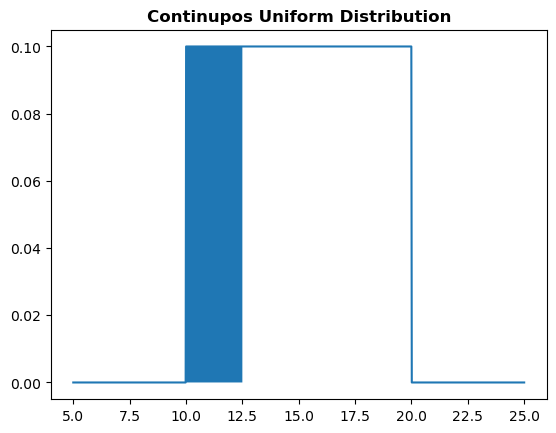

0.25
15.0
[0.71660192 0.84559213 0.23825087 0.86614729 0.08969933 0.49276247
 0.3201658  0.72999204 0.83254051 0.22319694]


In [24]:
import numpy as np
from scipy.stats import uniform
import matplotlib.pyplot as plt

A = 10
B = 20

x = np.linspace(A - 5, B + 5, 1000)
y = uniform.pdf(x, A, B - A)

plt.title('Continupos Uniform Distribution', fontweight='bold')
plt.plot(x, y)

x = np.linspace(10, 12.5, 1000)
y = uniform.pdf(x, A, B - A)
plt.fill_between(x, y)
plt.show()

result = uniform.cdf(12.5, A, B - A)
print(result)                               # 0.25

result = uniform.ppf(0.5, A, B - A)
print(result)  

"""
    Düzgün dağılmış rastgele sayı aslında bizim aşina olduğumuz klasik rastgele üretimidir. Örneğin Python standart kütüphanesindeki
    random modülünde bulnan random fonksiyonu 0 ile 1 arasında rastgele bir sayı veriyordu. Aslında bu fonksiyon a = 0, b = 1 olan
    düzgün dağılımda rastegele sayı veren fonksiyonla tamamne aynıdır. Bnezer biçimde NumPy'daki random modülündeki 
    random fonksiyonu 0 ile 1 arasında düzgün dağılmış rastgele sayı üretmektedir. Örneğin:
    result = uniform.rvs(10, 10, 10)
    Burada a = 10, b = 20 olan sürekli düzgün dağılımda 10 tane rastgele noktalı sayı elde edilecektir. 
    Örneğin 100 ile 200 arasında rastgele 10 tane gerçek sayı üretmek istesek bu işlemi şöyle yapmalıyız:
    uniform.rvs(100, 200, 10)

"""
from scipy.stats import uniform
import numpy as np

x = np.random.random(10)
print(x)
x = uniform.rvs(0, 1, 10)       # yukarıdakiyle tamamen aynı biçimde rassal sayı üretir


In [ ]:
                                            #T-dagilimi 
"""
    Özellikle güven aralıklarında (confidence interval) ve hipotez testlerinde kullanılan diğer önemli bir sürekli dağılım da 
    "t dağılımı (t distribution)" denilen dağılımdır. t dağılımını bulan kişi makalesini "Student" takma ismiyle yayınladığından 
    dolayı bu dağılıma "Student's t distribution" da denilmektedir. 
    
    t dağılımı standart normal dağılıma oldukça benzemektedir. Bu dağılımın ortalaması 0'dır. Ancak standart sapması "serbestlik derecesi 
    (degrees of freedom)" denilen bir değere göre değişir. t dağılımının standart sapması sigma = karekök(df / (df - 2)) biçimindedir. 
    t dağılımın olasılık yoğunluk fonksiyonu biraz karmaşık bir görüntüdedir. Ancak fonksiyon standart normal dağılıma göre 
    "daha az yüksek ve biraz daha şişman" gibi gözükmektedir. t dağılımının serbestlik derecesi artırıldığında dağılım 
    standart normal dağılıma çok benzer hale gelir. Serbestlik derecesi >= 30 durumunda standart normal dağılımla oldukça örtüşmektedir.
    Yani serbestlik derecesi >= 30 durumunda artık t dağılımı kullanmakla standart normal dağılım kullanmak arasında önemli bir 
    farklılık kalmamaktadır.

    t dağılımı denildiğinde her zaman ortalaması 0 olan standart sapması 1 olan (bu konuda bazı ayrıntılar vardır) dağılım 
    anlaşılmaktadır. Tabii t dağılımı da eksende kaydırılabilir ve standart sapma değiştirilebilir. 

    t dağılımı teorik bir dağılımdır. Yukarıda da belirttiğimiz gibi özellikle "güven aralıklarının oluşturulması" ve "hipotez
    testlerinde" kullanım alanı bulmaktadır. Bu tür durumlarda anakütle standart sapması bilinmediği zaman örnek standart sapması
    anakütle standart sapması olarak kullanılmakta ve t dağılımından faydalanılmaktadır. Eskiden t dağılımı özellikle "anakütle
    standart sapmasının bilinmediği ve örneklem büyüklüğünün < 30 olduğu durumlarda" kullanılıyordu. (Çünkü örneklem büyüklüğü
    >= 30 olduğu durumda zaten t dağılımı standart normal dağılıma çok yaklaşmaktadır.) Ancak artık bilgisayarların yoğun kullanıldığı
    bu zamanlarda örnek büyüklüğü >= 30 olsa bile t dağılımını kullanmak toplamda çok küçük olsa da yine tercih edilebilmektedir.

    t dağılımının önemli bir parametresi "serbestlik derecesi (degrees of freedom)" denilen parametresidir. Serbestlik derecesi 
    örneklem büyüklüğünden bir eksik değeri belirtir. Örneğin örneklem büyüklüğü 10 ise serbestlik derecesi 9'dur. Serbestlik 
    derecesi (dolayısıyla örneklem büyüklüğü) artırıldıkça t dağılımı standart normal dağılıma benzer. Yukarıda da belirttiğimiz 
    gibi n >= 30 durumunda artık yavaş yavaş t dağılımının standart normal dağılımdan önemli bir farkı kalmamaktadır.
    
"""



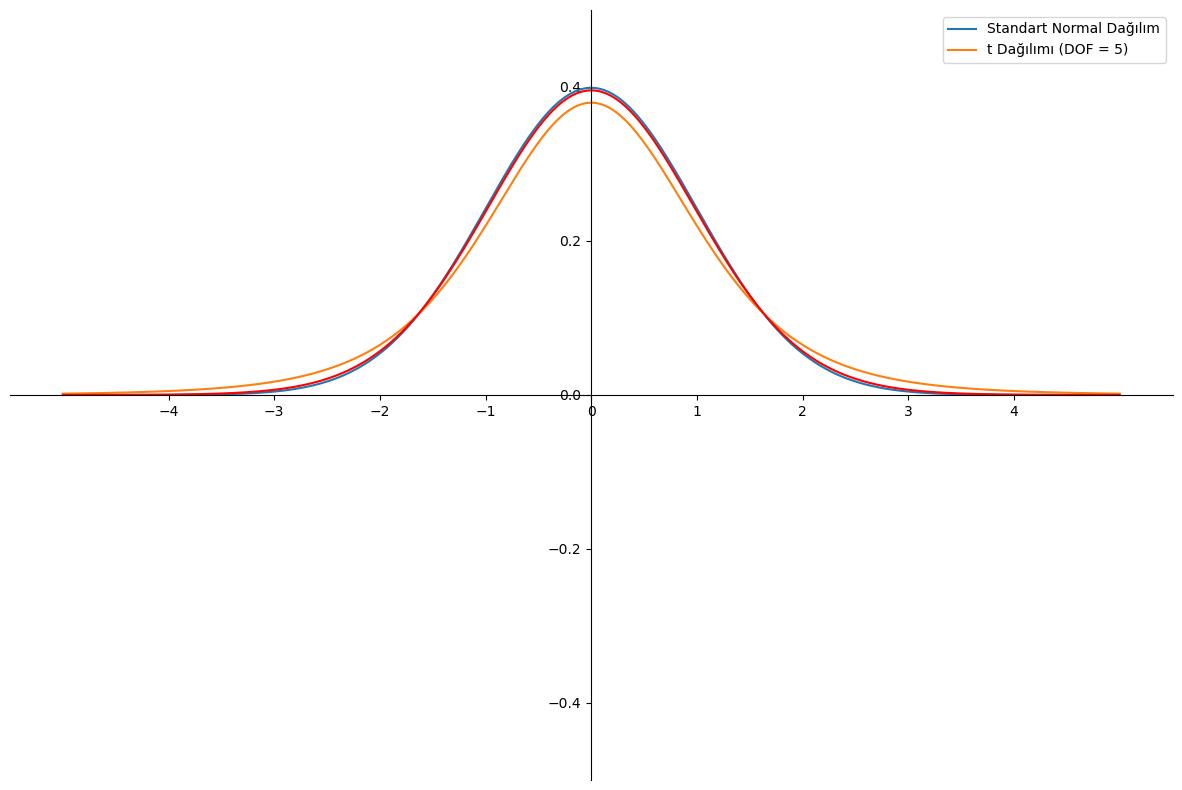

In [25]:
"""
    t dağılımına ilişkin Python standart kütüphanesinde bir sınıf yoktur. NumPy kütüphanesinde de t dağılımına ilişkin bir öğe 
    bulunmamaktadır. Ancak SciPy kütüphanesindeki stats modülünde t isimli singleton nesne t dağılımı ile işlem yapmak için 
    kullanılmaktadır. t isimli singleton nesnenin metotları norm nesnesinin metotlarıyla aynıdır. Bu fonksiyonlar genel olarak 
    önce x değerlerini sonra serbestlik derecesini, sonra da ortalama değeri ve standart sapma değerini parametre olarak almaktadır. 
    Ancak yukarıda da belirttiğimiz gibi t dağılımı denildiğinde genel olarak ortalaması 0, standart sapması 1 olan t dağılımı anlaşılır. 

    Aşağıdaki örnekte t dağılımı ile standart normal dağılım aynı eksende 3 serbeslik derecesi ile çizdirilmiştir. İki eğri arasında 
    şekilsel farklılığı inceleyiniz. 
    
    Aşağıdaki programda standart normal dağılım ile 5 serbestlik derecesi ve 30 30 serbestlik derecesine ilişkin t dağılımlarının
    olasılık yoğunluk fonksiyonları çizdirilmiştir. Burada özellikle 30 serbestlik derecesine ilişkin t dağılımının grafiğinin 
    standart normal dağılım grafiği ile örtüşmeye başladığına dikkat ediniz.
"""

import numpy as np
from scipy.stats import norm, t
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
x = np.linspace(-5, 5, 1000)
y = norm.pdf(x)

axis = plt.gca()
axis.set_ylim(-0.5, 0.5)
axis.spines['left'].set_position('center')
axis.spines['bottom'].set_position('center')
axis.spines['top'].set_color(None)
axis.spines['right'].set_color(None)
axis.set_xticks(range(-4, 5))
plt.plot(x, y)
y = t.pdf(x, 5)
plt.plot(x, y)
plt.legend(['Standart Normal Dağılım', 't Dağılımı (DOF = 5)', 't dağılımı (DOF = 30)'])

y = t.pdf(x, 30)
plt.plot(x, y, color='red')
plt.show()


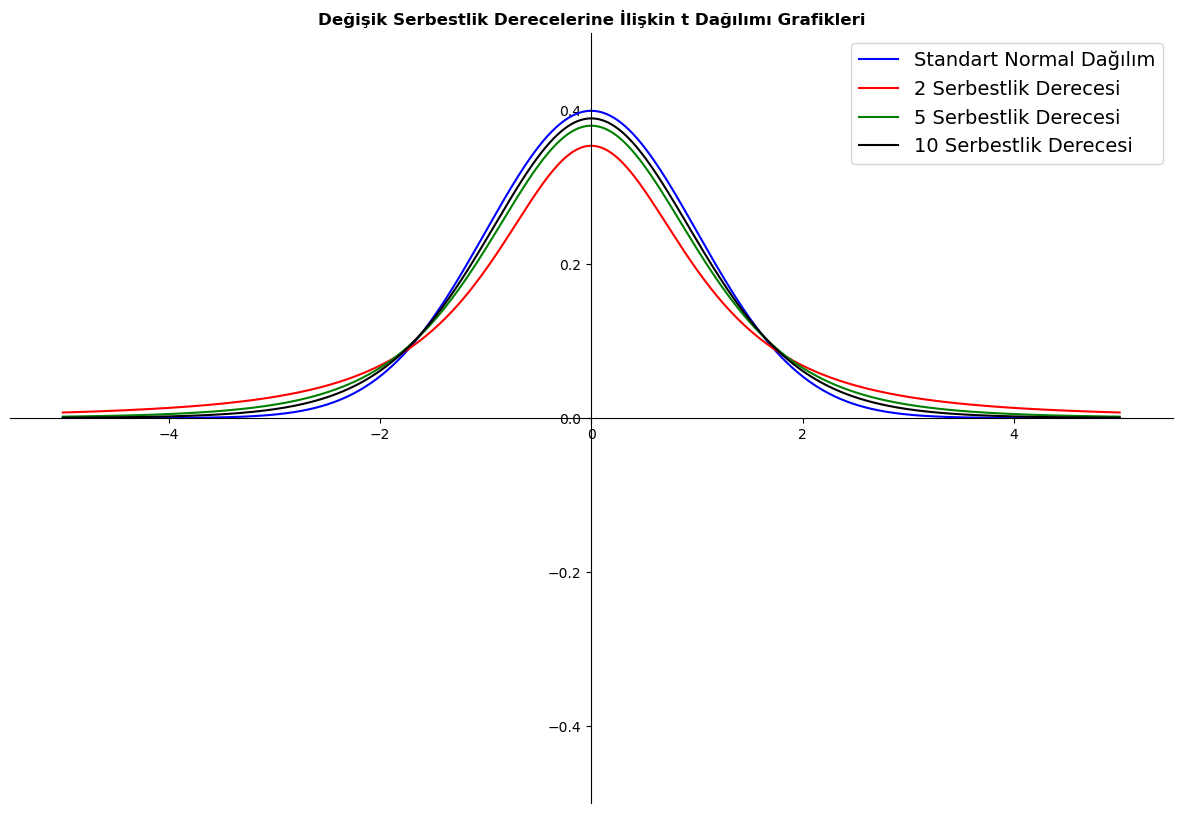

[0.30853754 0.5        0.84134475 0.89435023]
[0.31914944 0.5        0.81839127 0.86669189]


In [27]:
"""
    Aşağıdaki örnekte standart normal dağılımla çeşitli serbestlik derecelerine ilişkin t dağılımlarının grafiği aynı eksen 
    üzerine çizilmiştir. 
"""
from scipy.stats import norm,  t
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 1000)

plt.figure(figsize=(15, 10))
plt.title('Değişik Serbestlik Derecelerine İlişkin t Dağılımı Grafikleri', fontweight='bold')
axis = plt.gca()
axis.set_ylim(-0.5, 0.5)
axis.spines['left'].set_position('center')
axis.spines['bottom'].set_position('center')
axis.spines['top'].set_color(None)
axis.spines['right'].set_color(None)

y_norm = norm.pdf(x)
plt.plot(x, y_norm, color='blue')

df_info = [(2, 'red'), (5, 'green'), (10, 'black')]

for df, color in df_info:
    y_t = t.pdf(x, df)
    plt.plot(x, y_t, color=color)
    
plt.legend(['Standart Normal Dağılım'] + [f'{t[0]} Serbestlik Derecesi' for t in df_info], fontsize=14)

plt.show()

"""
    Tabii standart normal dağılımla t dağılının olasılık yoğunluk fonksiyonları farklı olduğuna göre aynı değerlere ilişkin 
    kümülatif olasılık değerleri de farklı olacaktır.  
"""
from scipy.stats import norm,  t

x = [-0.5, 0, 1, 1.25]
result = norm.cdf(x)
print(result)               # [0.30853754 0.5        0.84134475 0.89435023]

x = [-0.5, 0, 1, 1.25]
result = t.cdf(x, 5)    
print(result)               # [0.31914944 0.5        0.81839127 0.86669189]



In [ ]:
#Kesikli Dagilimlar

"""
    Biz bu konuda sürekli dağılım olarak yalnızca "normal dağılımı", "düzgün dağılımı" ve ""t dağılımını" inceledik. Aslında 
    değişik olayları modellemek için başka dağılımlar da kullanılmaktadır. Bunlardan bazılarını ileride başka konular içerisinde
    ele alacağız.
"""

"""
    Biz yukarıda bazı sürekli dağılımları inceledik. Kursumuzda genellikle sürekli dağılımları kullanacağız. Ancak bu noktada
    kesikli (discrete) dağılımlar üzerinde de bazı bilgiler vermek istiyoruz. 

    Kesikli dağılımlarda X değerleri her gerçek değeri almamaktadır. Dolayısıyla bunların fonksiyonları çizildiğinde sürekli
    fonksiyonlar elde edilemeyecek yalnızca noktalar elde edilecektir. Kesikli dağılımlarda X değerlerini onların olasılıklarına
    eşleyen fonksiyonlara "olasılık kütle fonksiyonu (probability mass function)" denilmektedir. Süreklei rassal değişkenlerin
    olasılık yoğunluk fonksiyonları integral hesap için kullaılırken kesikli rassal değişkenler için olasılık kütle fonksiyonları
    doğrudan rassal değişkeninin ilgili noktadaki olasılığını vermektedir. Tabii olasılık kütle fonksiyonu f(x) olmak üzere 
    her x için f(x) değerlerinin toplamının yine 1 olması gerekmektedir. 

    Tıpkı sürekli rassak değişkenlerde olduğu gibi kesikli rassal değişkenlerde de çok sık karşılaşılan bazı olasılık dağılımları 
    vardır. 
"""


In [ ]:
#PMF tanimi : probability mass function 

"""
   En çok karşılaşılan kesikli dağılımlardan biri "poisson (genellikle "puason" biçiminde okumuyor)" dağılımıdır. Bu kesikli 
    dağılım adeta normal dağılımın kesikli versiyonu gibidir. Poisson dağılımının olasılık kütle fonksiyonu şöyledir:

    P(X = x) = (e ** -lambda * lambda ** x) / x!

    Dağılımın olasılık kütle fonksiyonu size biraz karşık gelebilir. Buradaki x olasılığını hesaplamak istediğimiz kesikli 
    değeri belirtmektedir. Lamda ise ortalama olay sayısını belirtmektedir. Lambda değeri ortalama belirttiği için gerçek 
    bir değer olabilir. Ancak x değerleri 0, 1, 2, ... n biçiminde o ve pozitif tamsayılardan oluşmaktadır.

    Yukarıda da belirttiğimiz gibi poisson dağılımı adeta normal dağılımın kesikli hali gibidir. Dolayısıyla doğada da çok 
    karşılaşılan kesikli dağılımlardandır. Buradaki lamda değeri "ortalama olay sayısını" belirtmektedir. Örneğin lamda değeri
    "bir futbol maçındaki ortalama gol sayısını" ya da "İstanbul'da meydana gelen ortalama trafik kazası sayısını" belirtiyor 
    olabilir. Bir olgunun poisson dağılımı ile temsil edilmesi aslında "ortalama civarında yüksek olasıkların ortalamadan 
    iki yandan uzaklaştıkça olasılıkların çan eğrisi gibi düştüğü" bir durumu belirtmektedir. 

    Poisson dağılımı için de Python standart kütüphanesinde ya da Numpy ve Pandas kütüphanelerinde özel fonksiyonlar ve sınıflar 
    bulunmamaktadır. Ancak SciPy kütüphanesinin stats modülü içerisinde poisson isimli bir single nesne ile bu dağılımla ilgili 
    işlemler kolaylıkla yapılabilmektedir. 

    SciPy'da kesikli dağılımlar üzerinde işlemler yapan singleton nesneler sürekli dağılımlarla işlemler yapan single nesnelere
    kullanım bakımından oldukça benzemektedir. Ancak kesikli dağılımlar için fonksiyonun ismi "pdf değil pmf" biçimindedir. 
    Burada "pmf" ismi "probability mass function" sözcükleridnen kısaltılmıştır. 

    SciPy'daki poisson nesnesinin fonksiyonları genel olarak bizden x değerini ve lambda değerini parametre olarak istemektedir. 
    Örneğin maçlardaki gol sayısının poisson dağılıma uyduğunu varsayalım. Maçlardaki ortalama gol sayısının 2 olduğunu kabul edelim. 
    Bu durumda bir maçta 5 gol olma olasılığı aşağıdaki gibi elde edilebilir:

    result = poisson.pmf(5, 2)
    print(result)           # 0.03608940886309672

    Yukarıdaki gibi poisson dağılımı sorularında genellikle soruyu soran kişi belli bir olayın ortalama gerçekleşme sayısını verir. 
    Sonra kişiden bazı değerleri bulmasını ister. Pekiyi soruda "bir maçta ikiden fazla gol olma olasılığı sorulsaydı biz 
    soruyu nasıl çözerdik? poisson nesnesi ile cdf fonksiyonunu çağırdığımızda bu cdf fonksiyonu bize x değerine kadarki 
    (x değeri de dahil olmak üzere) kümülatif olasılığı verecektir. Bu değeri de 1'den çıkartırsak istenen olasılığı elde edebiliriz:

    result = 1 - poisson.cdf(2, 2)
    print(result)   # 0.3233235838169366

"""



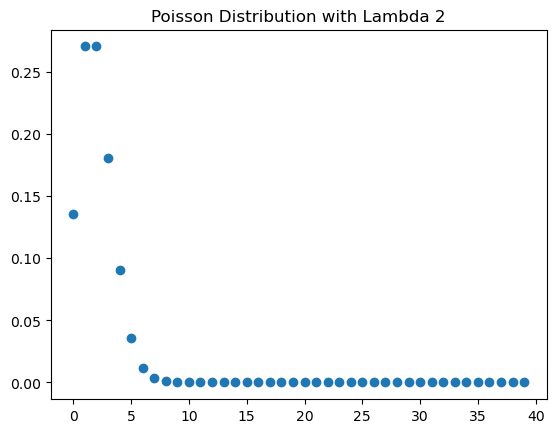

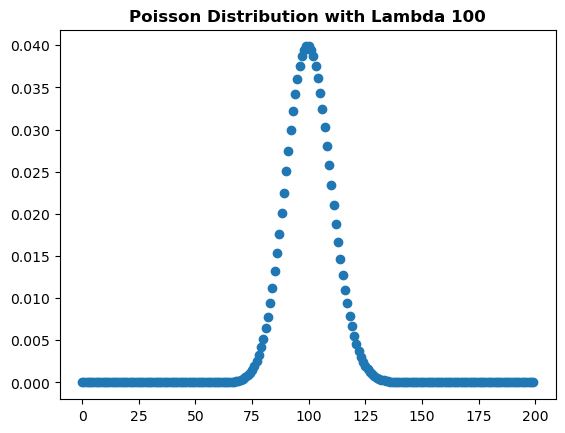

0.19536681481316454


In [2]:
"""
    Aşağıda lambda değeri (ortalaması) 2 olan puason dağılımı için saçılma grafiği çizdirilmiştir. Bu grafik normal dağılım
    grafiğini andırmakla birlikte sağdan çarpık olduğuna dikkat ediniz. 
"""
from scipy.stats import poisson
import matplotlib.pyplot as plt

plt.title('Poisson Distribution with Lambda 2')
x = range(0, 40)
y = poisson.pmf(x, 2)

plt.scatter(x, y)
plt.show()

"""
Poisson dağılımında lamda değeri yüksek tutulursa saçılma grafiğinin Gauss eğrisine benzediğine dikkat ediniz. 

"""
from scipy.stats import poisson
import matplotlib.pyplot as plt

plt.title('Poisson Distribution with Lambda 100', fontweight='bold')
x = range(0, 200)
y = poisson.pmf(x, 100)

plt.scatter(x, y)
plt.show()

result = poisson.pmf(3, 4)
print(result)
